# Regression Evaluation

Why do we evaluate models?

- Does this model add any value?
- Which model is better?
- How confident am I in my model's predictions?

**tl;dr**

- rmse: how far off the typical prediction is; same units as the target; smaller is better
- R2: variance in y explained by X; closer to 1 is better

## Setup

In [19]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
np.random.seed(123)

df = pd.DataFrame()
df['x1'] = np.random.randn(100)
df['x2'] = np.random.randn(100)
df['y'] = df.x1 + df.x2 + np.random.randn(100) * .5

df.head()

,x1,x2,y
0,-1.085631,0.642055,-0.091921
1,0.997345,-1.977888,-1.279595
2,0.282978,0.712265,2.095594
3,-1.506295,2.598304,1.436158
4,-0.578600,-0.024626,-0.606380


## Make Predictions 

In [21]:
model = LinearRegression().fit(df[['x1', 'x2']], df.y)
df['yhat'] = model.predict(df[['x1', 'x2']])

In [22]:
df['yhat_baseline'] = df.y.mean()

In [23]:
df.head()

,x1,x2,y,yhat,yhat_baseline
0,-1.085631,0.642055,-0.091921,-0.455018,-0.039992
1,0.997345,-1.977888,-1.279595,-1.075294,-0.039992
2,0.282978,0.712265,2.095594,0.949409,-0.039992
3,-1.506295,2.598304,1.436158,1.113599,-0.039992
4,-0.578600,-0.024626,-0.606380,-0.635276,-0.039992


## Calculate Evaluation Metrics

In [24]:
df['residuals'] = df.y - df.yhat

In [26]:
df['baseline_residuals'] = df.y - df.yhat_baseline

In [27]:
sse = (df.residuals ** 2).sum()
sse

23.398604227429

In [28]:
n = df.shape[0]

In [29]:
mse = sse / n
mse

0.23398604227429

In [30]:
rmse = math.sqrt(mse)
rmse

0.48372103765940344

In [31]:
sse_baseline = (df.baseline_residuals ** 2).sum()
mse_baseline = sse_baseline / n
rmse_baseline = math.sqrt(mse_baseline)

print(f'''
Baseline:

sse:  {sse_baseline}
mse:  {mse_baseline}
rmse: {rmse_baseline}
''')


Baseline:

sse:  236.31687655079307
mse:  2.3631687655079308
rmse: 1.5372601489363895



In [32]:
ess = ((df.yhat - df.y.mean())**2).sum()
tss = ((df.y - df.y.mean())**2).sum()

ess / tss

0.9009863173170374

In [33]:
ess = ((df.yhat_baseline - df.y.mean())**2).sum()
tss = ((df.y - df.y.mean())**2).sum()

print('ess: %.4f' % ess)

ess / tss

ess: 0.0000


0.0

## Visualize Residuals

<AxesSubplot:ylabel='Frequency'>

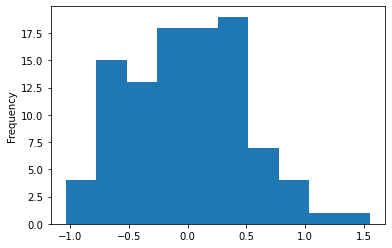

In [34]:
df.residuals.plot.hist()

<AxesSubplot:ylabel='Frequency'>

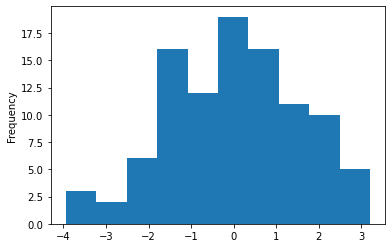

In [35]:
df.baseline_residuals.plot.hist()

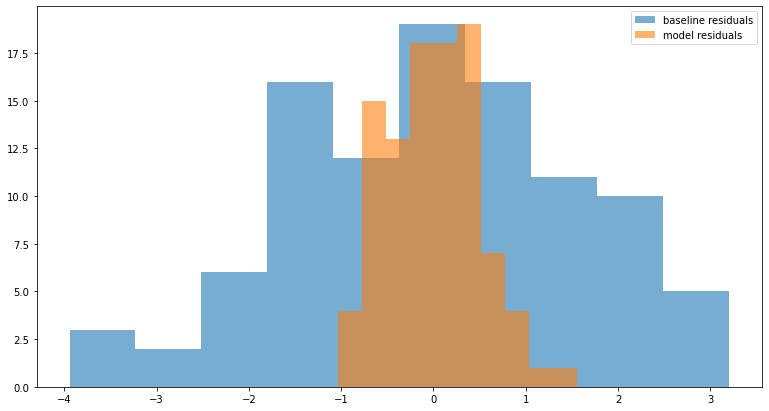

In [36]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.hist(df.baseline_residuals, label='baseline residuals', alpha=.6)
ax.hist(df.residuals, label='model residuals', alpha=.6)
ax.legend()

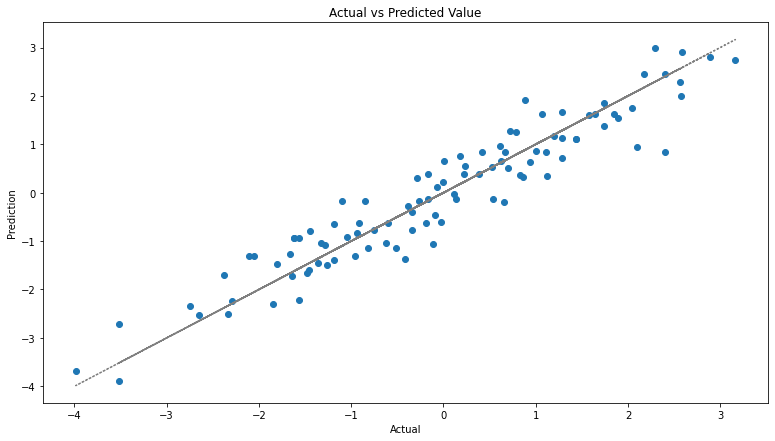

In [37]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.scatter(df.y, df.yhat, label='predicted')
ax.set(title='Actual vs Predicted Value', ylabel='Prediction', xlabel='Actual')
ax.plot(df.y, df.y, ls=':', c='gray')

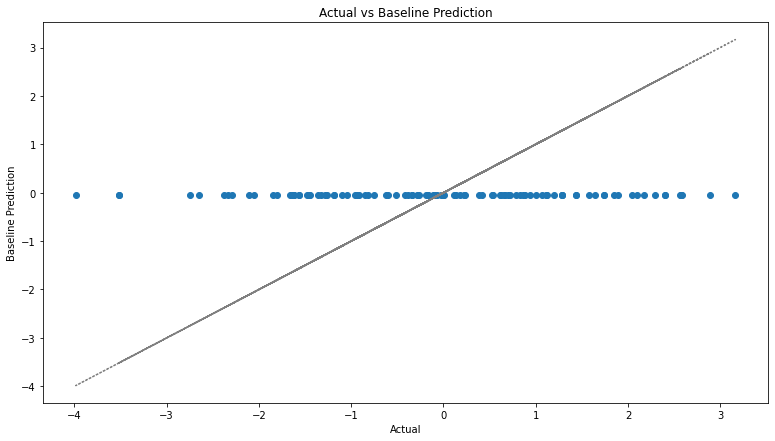

In [38]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.scatter(df.y, df.yhat_baseline, label='baseline prediction')
ax.set(title='Actual vs Baseline Prediction', ylabel='Baseline Prediction', xlabel='Actual')
ax.plot(df.y, df.y, ls=':', c='gray')

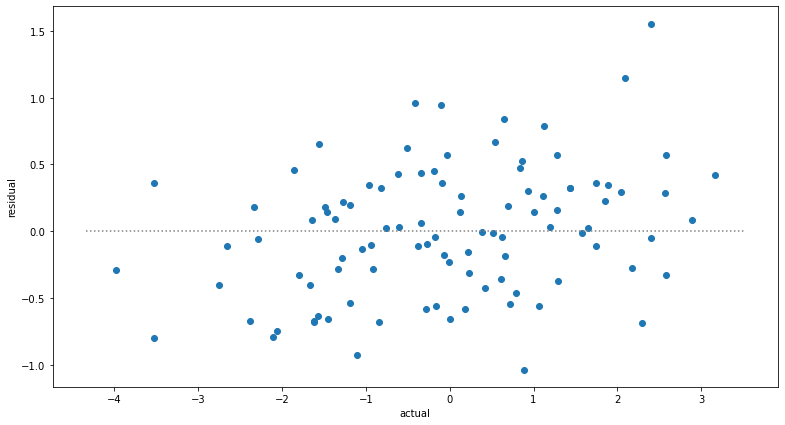

In [39]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.scatter(df.y, df.residuals)
ax.set(ylabel='residual', xlabel='actual')
ax.hlines(0, *ax.get_xlim(), ls=':', color='gray')

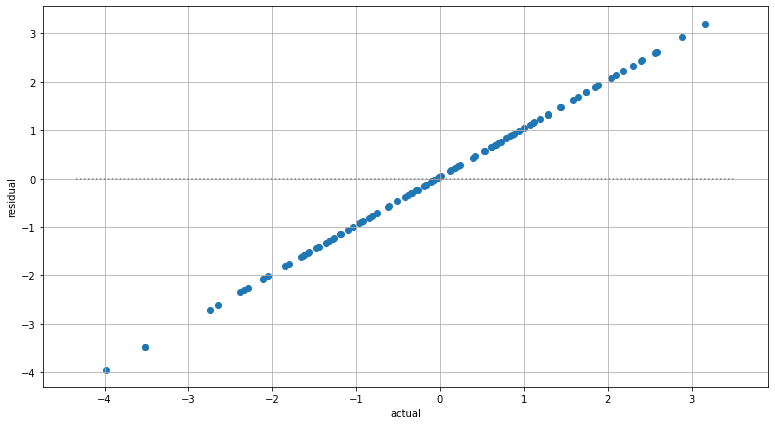

In [40]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.scatter(df.y, df.baseline_residuals)
ax.set(ylabel='residual', xlabel='actual')
ax.hlines(0, *ax.get_xlim(), ls=':', color='gray')
ax.grid()

### The "Easy" Way

In [41]:
from sklearn.metrics import r2_score, mean_squared_error

In [42]:
r2_score(df.y, df.yhat)

0.9009863173170377

In [43]:
r2_score(df.y, df.yhat_baseline)

0.0

In [44]:
mean_squared_error(df.y, df.yhat)

0.23398604227429